### Example to use tiledb generator

In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../src/training")
from generators.tiledb_generator import *
import tiledb 

gen=TiledbGenerator(batch_size=50,
                    ref_fasta="/mnt/data/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta", # reference sequence file
                    tdb_array="/oak/stanford/groups/akundaje/anusri/bpnet_data/gm12878_dnase/db", # database generated
                    chroms=['chr10'],
                    num_inputs=1,
                    num_outputs=2,
                    tdb_input_datasets=['seq'],
                    tdb_output_datasets=['ENCSR000EMT', 'ENCSR000EMT'],
                    tdb_input_source_attribute=['seq'],
                    tdb_output_source_attribute=['count_bigwig_unstranded_5p', 'count_bigwig_unstranded_5p'],
                    tdb_input_flank=['1057'],
                    tdb_output_flank=['500', '500'],
                    tdb_input_min=['None'], 
                    tdb_output_min=['None', 'None'],
                    tdb_input_max=['None'],
                    tdb_output_max=['None', 'None'],
                    tdb_input_aggregation=['None'],
                    tdb_input_transformation=['None'],
                    tdb_output_aggregation=['None','sum'],
                    tdb_output_transformation=['None','log'],
                    tdb_partition_attribute_for_upsample='overlap_peak',
                    tdb_partition_thresh_for_upsample=1,
                    tdb_partition_datasets_for_upsample=['ENCSR000EMT'],
                    upsample_ratio=1.0,
                    shuffle_epoch_start=True,
                    shuffle_epoch_end=True,
                    return_coords=True,
                    tdb_config=get_default_config(),
                    tdb_ctx=tiledb.Ctx(config=get_default_config()),
                    num_threads=24,
                    pseudocount=1)
                   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
opening:/oak/stanford/groups/akundaje/anusri/bpnet_data/gm12878_dnase/db for reading...
success!
got indices for used chroms
identified input dataset indices:[[]]
identified output dataset indices:[[0], [0]]
identified upsampling dataset indices:[0]
num_threads:24
starting getting indices to upsample in range:1674883629-1808681051


In [ ]:
gen.num_indices

In [ ]:
(X,y,coords)=gen[0]

In [ ]:
print(X.shape)

In [11]:
y[0].shape

(50, 1000, 1)

In [13]:
y[1].shape

(50, 1)

In [14]:
print(y[1])

[[5.7589016]
 [4.8598123]
 [4.762174 ]
 [5.209486 ]
 [5.4510384]
 [5.1416636]
 [7.7506146]
 [7.2283883]
 [5.0172796]
 [5.8021183]
 [7.293698 ]
 [5.1059456]
 [4.634729 ]
 [6.349139 ]
 [4.6151204]
 [7.1507015]
 [4.9767337]
 [5.7838254]
 [7.2348986]
 [4.94876  ]
 [4.75359  ]
 [5.9558372]
 [5.0039463]
 [5.1059456]
 [3.7612002]
 [4.5325994]
 [4.94876  ]
 [5.4510384]
 [5.609472 ]
 [5.572154 ]
 [7.215975 ]
 [6.070738 ]
 [6.340359 ]
 [7.010312 ]
 [6.4216223]
 [4.1108737]
 [4.919981 ]
 [4.4426513]
 [5.5093884]
 [5.6937323]
 [7.6024013]
 [7.3421316]
 [4.3438053]
 [5.587249 ]
 [7.784057 ]
 [5.081404 ]
 [5.602119 ]
 [5.602119 ]
 [7.080868 ]
 [6.289716 ]]


In [15]:
import matplotlib 
import matplotlib.pyplot as plt 

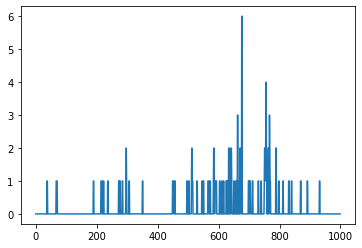

In [19]:
plt.plot(y[0][3,:,0])